---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import hashlib
import os
import pickle
import csv as csv
import tensorflow as tf
import cv2
import numpy as np
from PIL import Image
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from zipfile import ZipFile
import pickle
from skimage import color
print('All modules imported.')


All modules imported.


In [2]:
# Load pickled data

is_greyscale_done = False
is_features_normal = False
# TODO: fill this in based on where you saved the training and testing data
training_file = "traffic-signs-data/train.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

is_labels_encod = False

In [3]:
if not is_labels_encod:
    # Turn labels into numbers and apply One-Hot Encoding
    encoder = LabelBinarizer()
    encoder.fit(y_train)
    y_train = encoder.transform(y_train)
    y_test = encoder.transform(y_test)

In [4]:
print(len(X_train))
print(len(X_test))
print(len(np.unique(y_train)))
print(X_train.shape[1])
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


39209
12630
2
32
(39209, 43)
(12630, 32, 32, 3)
(12630, 43)


In [5]:
#Lets Reduce the test set initially so that training is easy
docker_train_limit = 39209
X_train, y_train = resample(X_train, y_train, n_samples=docker_train_limit)
len(X_train)

39209

In [6]:
### Helper Function to plot the images in a grid
### Modified from : Courtesy :: https://github.com/Hvass-Labs/TensorFlow-Tutorials/blob/master/02_Convolutional_Neural_Network.ipynb
# images :: input images a set of 
# cls_true :: is the true class
# cls_pred :: is the predicted class
# rsh :: in case an image needs to be reshaped

def plot_images(images, cls_true, cls_pred=None, rsh=None):
    assert len(images) == len(cls_true) 
    
    # Create figure with nxn subplot
    fig, axes = plt.subplots(int(np.sqrt(len(images))), int(np.sqrt(len(images))))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        if rsh is None:
            ax.imshow(images[i], cmap='gray')
        else:
            ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [7]:
### Translate Images
X_translated = []
y_translated = []
def image_translate(img):
    rows,cols = img.shape[0], img.shape[1]    
    M = np.float32([[1,0,5],[0,1,5]])
    dst = cv2.warpAffine(img,M,(cols,rows))
    return np.array(dst)

for img,y in zip(X_train, y_train):
    X_translated.append(image_translate(img))
    y_translated.append(y)


In [8]:
### Transform Images

def image_trans(img):
    rows,cols = img.shape[0], img.shape[1]
    pts1 = np.float32([[5,5],[20,5],[5,20]])
    pts2 = np.float32([[1,10],[20,5],[10,25]])
    M = cv2.getAffineTransform(pts1,pts2)
    dst = cv2.warpAffine(img,M,(cols,rows))
    return np.array(dst)

for img,y in zip(X_train, y_train):
    X_translated.append(image_trans(img))
    y_translated.append(y)


### Rotate Images
def image_rotate(img):
    rows,cols = img.shape[0], img.shape[1]    
    M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
    dst = cv2.warpAffine(img,M,(cols,rows))
    return np.array(dst)

for img,y in zip(X_train, y_train):
    X_translated.append(image_rotate(img))
    y_translated.append(y)


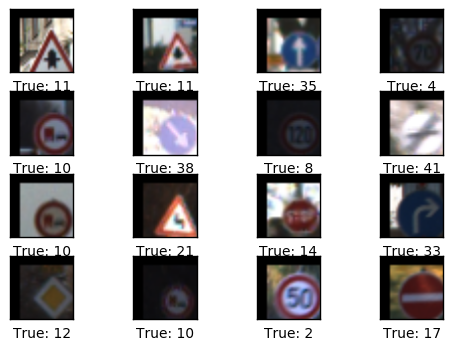

(156836, 32, 32, 3)


In [9]:
### Change Perspective

def image_pers_trans(img):
    rows,cols = img.shape[0], img.shape[1]    
    pts1 = np.float32([[5,5],[27,5],[5,27],[27,27]])
    pts2 = np.float32([[0,0],[32,0],[0,32],[32,32]])
    M = cv2.getPerspectiveTransform(pts1,pts2)
    dst = cv2.warpPerspective(img,M,(32,32))
    return np.array(dst)

for img,y in zip(X_train, y_train):
    X_translated.append(image_pers_trans(img))
    y_translated.append(y)
 

#Finally append all the original images as well
for img,y in zip(X_train, y_train):
    X_translated.append(img)
    y_translated.append(y)

X_train = X_translated
y_train = y_translated
plot_images(X_translated[0:16],np.argmax(y_translated[0:16], axis=1),None,None)
X_train = np.array(X_train)
print(X_train.shape)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.05, random_state=42)


In [10]:

print(X_train.shape)

(148994, 32, 32, 3)


In [11]:
### To start off let's do a basic data summary.

# Intially lets plan grayscale image training
n_channels = 1
# TODO: number of training examples
n_train = len(X_train)

# TODO: number of testing examples
n_test = len(X_test)

# TODO: what's the shape of an image? 
# We will wor on gray scale images
image_shape = (X_train.shape[1], X_train.shape[2])  

# TODO: how many classes are in the dataset
n_classes = 43 # len(np.unique(y_train))

image_size_flat = X_train.shape[1] * X_train.shape[2] * X_train.shape[3]
image_size = X_train.shape[1]
# Convolutional Layer 1.
filter_size1 = 5          # Convolution filters are 5 x 5 pixels.
num_filters1 = 32         # There are 16 of these filters.

# Convolutional Layer 2.
filter_size2 = 5          # Convolution filters are 5 x 5 pixels.
num_filters2 = 64         # There are 36 of these filters.

# Convolutional Layer 3.
filter_size3 = 3          # Convolution filters are 5 x 5 pixels.
num_filters3 = 128         # There are 36 of these filters.

# Fully-connected layer.
fc_size = 2048             # Number of neurons in fully-connected layer.

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 148994
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


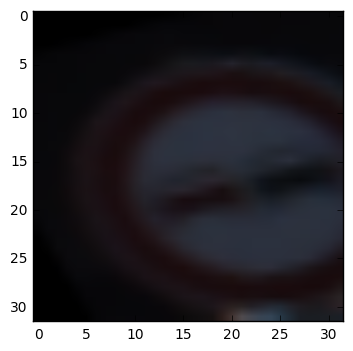

In [12]:
### Data exploration visualization goes here.
plt.imshow(np.array(X_train[0]))
plt.show()
### Feel free to use as many code cells as needed.

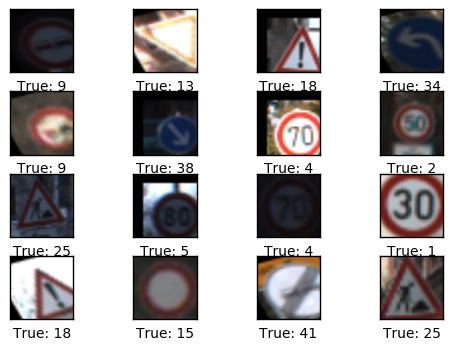

In [13]:
# Lets test whether we have success
plot_images(X_train[0:16],np.argmax(y_train[0:16], axis=1),None,None)  

In [14]:
### creating new weights helper functions
def new_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.1))
### create label helper function
def new_biases(length):
    return tf.Variable(tf.constant(0.1, shape=[length]))

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [15]:
### Preprocess the data here.
## Lets do Normalizaling first 
def normalize_greyscale(image_data):
    image_data_std = (image_data - image_data.mean())/(np.std(image_data))
    return (image_data_std - image_data_std.mean())/(np.max(image_data_std) - np.min(image_data_std))



#if not is_features_normal:
#    X_train = normalize_greyscale(X_train)
#    X_test = normalize_greyscale(X_test)
#    is_features_normal = True


# Take a look at one picture 
#list(X_train[0])    
X_train.shape
### Feel free to use as many code cells as needed.

(148994, 32, 32, 3)

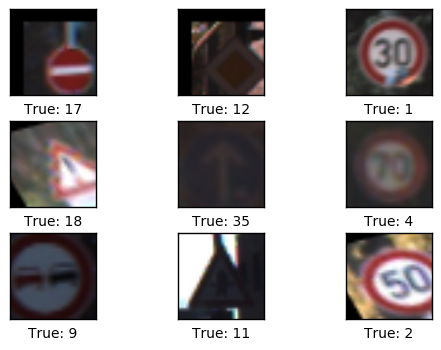

In [16]:
# Check whether we still have same images by looks and feel
plot_images(X_train[280:289],np.argmax(y_train[280:289], axis=1),None,None)
# Next we create all the images into Gray scale

In [17]:
from skimage import color

def convert2grayscale(image):
    return color.rgb2gray(image)

## Preprocess test images as such bcause these are small
if not is_greyscale_done:
    X_test =convert2grayscale(X_test)    
    shape_test_channel = (-1, X_test.shape[1], X_test.shape[2], 1) 
    X_test = np.reshape(X_test, shape_test_channel)
    is_greyscale_done = True
    
### Training data is too big to fit for conversion so one batch at a time in better    
def pre_proc(x_train):
    x_train = normalize_greyscale(x_train)
    x_train = convert2grayscale(x_train)
    #cv2.equalizeHist(x_train, x_train)
    shape_train_channel = (-1, x_train.shape[1], x_train.shape[2], 1) 
    x_train = np.reshape(x_train, shape_train_channel)
    return x_train

X_val = pre_proc(X_val)

In [18]:
### Data exploration visualization goes here.
X_train.shape
### Feel free to use as many code cells as needed.

(148994, 32, 32, 3)

In [19]:
# Shape after we X_train.shape
def new_conv_layer(input,              # The previous layer.
                   num_input_channels, # Num. channels in prev. layer.
                   filter_size,        # Width and height of each filter.
                   num_filters,        # Number of filters.
                   use_pooling=True):  # Use 2x2 max-pooling.

    # Shape of the filter-weights for the convolution.
    # This format is determined by the TensorFlow API.
    shape = [filter_size, filter_size, num_input_channels, num_filters]

    # Create new weights aka. filters with the given shape.
    weights = new_weights(shape=shape)

    # Create new biases, one for each filter.
    biases = new_biases(length=num_filters)

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='VALID')
    layer
    biases
    layer += biases
    # ReLU
    
    #layer = tf.nn.softmax(layer)
    layer = tf.nn.relu(layer)
    
    norm2 = tf.nn.lrn(layer, 4, bias=1.0, alpha=0.001 / 9.0, beta=0.75,
        name='norm2')
    # Use pooling to down-sample the image resolution?
    if use_pooling:
        # This is 2x2 max-pooling, which means that we
        # consider 2x2 windows and select the largest value
        # in each window. Then we move 2 pixels to the next window.
        layer = tf.nn.max_pool(value=norm2,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME')



    # Note that ReLU is normally executed before the pooling,
    # but since relu(max_pool(x)) == max_pool(relu(x)) we can
    # save 75% of the relu-operations by max-pooling first.

    # We return both the resulting layer and the filter-weights
    # because we will plot the weights later.
    return layer, weights

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**
I did following steps:

1) Normalization of Data
    Normalized images in the range 0.1 and 0.9
    Normalization is done so that the range of all input feature vectors is same. This helps in reducing oscillations in learning   curve.
2) I have not done normalizations after each layer. I am getting better results so I will save that part for future. I am working in Machine learning domain so I know that we do normalization of Input feature vectors at various layers.
3) Converted Color to Gray scale images  
    I converted data in grayscale using skilearn, then rehaped the data in again [?, 32, 32, 1] form because tensorflow needs 4D tensor as input. Grayscale image helped improve the training time, since I have less hyperparameters to take care of. Since we do not have classes where color matters, grayscaling is a good idea.
4) I used pseudo randomization to feed the batches. In earch iteration my starting point to read data is different.
5) I understand that image correction methods like histpgram equalizations can help further but I will save that excersise for future. It's too much work along with the fll time corporate job :)

In [20]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.


### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**
1) I used test set data provied directly.
2) Validation:: I rotated input in each iteration and used the different data after every 100th iteration to figure out whether I am going in good direction. 
3) Getting a right learning rate and correct architecture was hard for me. Finally I have something which is woring. There is not much change versus last submission. I just modified the hyperparameters after many iterations to get good results.
4) Only additional data is the data I got from online sources for one of the questions to answer.

In [21]:
def flatten_layer(layer):
    # Get the shape of the input layer.
    layer_shape = layer.get_shape()

    num_features = layer_shape[1] * layer_shape[2] * layer_shape[3] 
    print(num_features)
    shape_flat = tf.pack([tf.shape(layer)[0], num_features]) 
    #shape_flat = (-1, num_features)
    layer_flat = tf.reshape(layer, shape_flat)

    # Shape tuple is (num_images, img_height * img_width * n_channels)
    return layer_flat, num_features

In [22]:
def new_fc_layer(input,          # The previous layer.
                 num_inputs,     # Num. inputs from prev. layer.
                 num_outputs,    # Num. outputs.
                 use_relu=True): # Use Rectified Linear Unit (ReLU)?

    # Create new weights and biases.
    weights = new_weights(shape=tf.pack([num_inputs, num_outputs]))
    biases = new_biases(length=num_outputs)

    # Calculate the layer as the matrix multiplication of
    # the input and weights, and then add the bias-values.
    layer = tf.matmul(input, weights) + biases

    # Use ReLU?
    if use_relu:
        #layer = tf.nn.softmax(layer)
        layer = tf.nn.relu(layer)

    return layer


In [23]:
# Place holder variables
x = tf.placeholder(tf.float32, shape=[None, image_size, image_size, n_channels], name='x')
keep_prob = tf.placeholder(tf.float32)
y_true = tf.placeholder(tf.float32, shape=[None, n_classes], name='y_true')  
y_true_cls = tf.argmax(y_true, dimension=1)

In [24]:
### Define your architecture here.
#Layer 1
layer_conv1, weights_conv1 = \
    new_conv_layer(input=x,
                   num_input_channels=n_channels,
                   filter_size=filter_size1,
                   num_filters=num_filters1,
                   use_pooling=True)
    


layer_conv1    


<tf.Tensor 'MaxPool:0' shape=(?, 14, 14, 32) dtype=float32>

In [25]:
#layer 2
layer_conv2, weights_conv2 = \
    new_conv_layer(input=layer_conv1,
                   num_input_channels=num_filters1,
                   filter_size=filter_size2,
                   num_filters=num_filters2,
                   use_pooling=True)
        

layer_conv2

<tf.Tensor 'MaxPool_1:0' shape=(?, 5, 5, 64) dtype=float32>

In [26]:
#layer 3
layer_conv3, weights_conv3 = \
    new_conv_layer(input=layer_conv2,
                   num_input_channels=num_filters2,
                   filter_size=filter_size3,
                   num_filters=num_filters3,
                   use_pooling=True)

layer_conv3 = tf.nn.dropout(layer_conv3, keep_prob)
layer_conv3

<tf.Tensor 'dropout/mul:0' shape=(?, 2, 2, 128) dtype=float32>

In [27]:

#Fully connect
layer_flat, num_features = flatten_layer(layer_conv2)

### Feel free to use as many code cells as needed.

1600


In [28]:
layer_flat

<tf.Tensor 'Reshape:0' shape=(?, 1600) dtype=float32>

In [29]:
print(num_features)
print(fc_size)
layer_fc1 = new_fc_layer(input=layer_flat,
                         num_inputs=num_features,
                         num_outputs=fc_size,
                         use_relu=True)



1600
2048


In [30]:
print(num_features)
print(fc_size)
layer_fc2 = new_fc_layer(input=layer_fc1,
                         num_inputs=fc_size,
                         num_outputs=1024,
                         use_relu=True)

#layer_fc2 = tf.nn.dropout(layer_fc2, keep_prob)

1600
2048


In [31]:

learning_rate = tf.placeholder(tf.float32)



In [32]:
layer_fc3 = new_fc_layer(input=layer_fc2,
                         num_inputs=1024,
                         num_outputs=n_classes,
                         use_relu=False)

In [33]:
fc_size
layer_fc2
n_classes

43

In [34]:
y_pred = tf.nn.softmax(layer_fc3)
top_5_prob = tf.nn.top_k(y_pred, 5, name=None)
y_pred_cls = tf.argmax(y_pred, dimension=1)

In [35]:
y_pred_cls

<tf.Tensor 'ArgMax_1:0' shape=(?,) dtype=int64>

In [36]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=layer_fc3,
                                                        labels=y_true)

#cross_entropy = -tf.reduce_sum(y_true * tf.log(y_pred), reduction_indices=1)
cost = tf.reduce_mean(cross_entropy)

In [37]:
optimizer = tf.train.AdagradOptimizer(learning_rate).minimize(cost)

#correct_prediction = tf.equal(y_pred_cls, y_true_cls)
#accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
# Determine if the predictions are correct
is_correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1))
# Calculate the accuracy of the predictions
accuracy = tf.reduce_mean(tf.cast(is_correct_prediction, tf.float32))

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

1) My architecture looks as 
  a) Since I understand Alexnet, I am trying something in that direction. 
  b) I have so far two convnet layers followed by two fully connected layers.
  c) I tried deeper layers but I was not getting better results. I still to the 2 convnet layers and 2 fully connected layers.
  d) first layer filter size is 5x5 and output feature map size is 32 (number of fileters)
  e) second layer filter size 5x5 and output feature map size is 64  
  f) First and second fully connected layer size 2048.
  g) I used dropouts for the training. With keep_prob = 0.5
  h) No dropout while testign it
  i) I also tried the third layer Covnet with filter size of 3x3 and OFM size of 128 but results were not so encouraging to increase complexity.



In [38]:
### Train your model here.
### Feel free to use as many code cells as needed.


In [39]:
from sklearn.utils import shuffle
total_iterations = 0
START_BATCH = 0
BATCH_SIZE = 128
lr = 0.012
epoch = 2 
x_batch=[]
y_true_batch =[]
session = tf.Session()
session.run(tf.initialize_all_variables())
def optimize(num_iterations):
    # Ensure we update the global variable rather than a local copy.
    global total_iterations
    global START_BATCH
    global lr
    # Start-time used for printing time-usage below.
    start_time = time.time()
    
    for j in range(epoch):
        if(j > 5):
            lr = lr/2
        START_BATCH = 0
        for i in range(total_iterations,
                       total_iterations + num_iterations):

            # Get a batch of training examples.
            # x_batch now holds a batch of images and
            # y_true_batch are the true labels for those images.
            x_batch            = X_train[START_BATCH : START_BATCH + BATCH_SIZE]
            y_true_batch       = y_train[START_BATCH : START_BATCH + BATCH_SIZE]
            START_BATCH        = START_BATCH + BATCH_SIZE
            x_batch, y_true_batch = shuffle(x_batch, y_true_batch, random_state=0)
            x_batch = pre_proc(x_batch);
            feed_dict_train = {x: x_batch,
                               y_true: y_true_batch, keep_prob:0.2, learning_rate:lr}
            
            #print(tf.shape(y_true_batch))
            #print(tf.shape(y_true))
            # Run the optimizer using this batch of training data.
            # TensorFlow assigns the variables in feed_dict_train
            # to the placeholder variables and then runs the optimizer.
            _, c = session.run([optimizer, cost], feed_dict=feed_dict_train)
            
            #print(c)
            
            # Print status every 100 iterations.
            if i % 100 == 0:
                # Calculate the accuracy on the training-set.
                feed_dict_train = {x: X_val,
                               y_true: y_val, keep_prob:1.0}                
                acc = session.run(accuracy, feed_dict=feed_dict_train)
                
                # Message for printing.
                msg = "Optimization Iteration: {0:>6}, Training Accuracy: {1:>6.1%} START_BATCH: {2:>6}"

                # Print it.
                print(msg.format(i + 1, acc, START_BATCH))

        # Update the total number of iterations performed.
        total_iterations = 0

        # Ending time.
        end_time = time.time()

        # Difference between start and end-times.
        time_dif = end_time - start_time

        # Print the time-usage.
        print("Time usage: " + str(timedelta(seconds=int(round(time_dif)))))

In [40]:
#min_after_dequeue = 1000
#capacity = min_after_dequeue + 3*BATCH_SIZE
#x_batch, y_true_batch = tf.train.shuffle_batch([X_train,y_train],
#                                                           batch_size = BATCH_SIZE,
#                                                           capacity = capacity, 
#                                                           min_after_dequeue=min_after_dequeue
#                                                          )
#x_batch = session.run(x_batch)
#y_true_batch = session.run(y_true_batch)

In [41]:
def plot_example_errors(cls_pred, correct):
    # This function is called from print_test_accuracy() below.

    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # correct is a boolean array whether the predicted class
    # is equal to the true class for each image in the test-set.

    # Negate the boolean array.
    incorrect = (correct == False)
    
    # Get the images from the test-set that have been
    # incorrectly classified.
    images = X_test[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = np.argmax(y_test, axis=1)   #y_test
    cls_true = cls_true[incorrect]
    print(len(cls_true))
    print(len(cls_pred))
    print(images[0:9].shape)
    shape_train_channel = (-1, X_train.shape[1], X_train.shape[2]) 
    imager = np.reshape(images[0:9], shape_train_channel)
    # Plot the first 9 images.
    plot_images(images=imager,
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

In [42]:
# Split the test-set into smaller batches of this size.
test_batch_size = 64

def print_test_accuracy(show_example_errors=False,
                        show_confusion_matrix=False):

    # Number of images in the test-set.
    num_test = len(X_test)
    #print(num_test)
    # Allocate an array for the predicted classes which
    # will be calculated in batches and filled into this array.
    cls_pred = np.zeros(shape=num_test, dtype=np.int)

    # Now calculate the predicted classes for the batches.
    # We will just iterate through all the batches.
    # There might be a more clever and Pythonic way of doing this.

    # The starting index for the next batch is denoted i.
    i = 0

    while i < num_test:
        # The ending index for the next batch is denoted j.
        j = min(i + test_batch_size, num_test)

        # Get the images from the test-set between index i and j.
        images = X_test[i:j, :]

        # Get the associated labels.
        labels = y_test[i:j, :]
        
        #images = pre_proc(images);
        # Create a feed-dict with these images and labels.
        feed_dict = {x: images,
                     y_true: labels, keep_prob:1.0}
        
        # Calculate the predicted class using TensorFlow.
        cls_pred[i:j] = session.run(y_pred_cls, feed_dict=feed_dict)

        # Set the start-index for the next batch to the
        # end-index of the current batch.
        i = j

    # Convenience variable for the true class-numbers of the test-set.
    cls_true = np.argmax(y_test, axis=1)   #y_test

    # Create a boolean array whether each image is correctly classified.
    correct = (cls_true == cls_pred)

    # Calculate the number of correctly classified images.
    # When summing a boolean array, False means 0 and True means 1.
    correct_sum = correct.sum()

    # Classification accuracy is the number of correctly classified
    # images divided by the total number of images in the test-set.
    acc = float(correct_sum) / num_test

    # Print the accuracy.
    msg = "Accuracy on Test-Set: {0:.1%} ({1} / {2})"
    print(msg.format(acc, correct_sum, num_test))

    # Plot some examples of mis-classifications, if desired.
    if show_example_errors:
        print("Example errors:")
        plot_example_errors(cls_pred=cls_pred, correct=correct)

    # Plot the confusion matrix, if desired.
    if show_confusion_matrix:
        print("Confusion Matrix:")
        plot_confusion_matrix(cls_pred=cls_pred)

In [43]:
import time
from datetime import timedelta
optimize(num_iterations=1100 )
print_test_accuracy(show_example_errors=False)

Optimization Iteration:      1, Training Accuracy:   5.5% START_BATCH:    128
Optimization Iteration:    101, Training Accuracy:  10.6% START_BATCH:  12928
Optimization Iteration:    201, Training Accuracy:  27.2% START_BATCH:  25728
Optimization Iteration:    301, Training Accuracy:  40.6% START_BATCH:  38528
Optimization Iteration:    401, Training Accuracy:  52.2% START_BATCH:  51328
Optimization Iteration:    501, Training Accuracy:  60.8% START_BATCH:  64128
Optimization Iteration:    601, Training Accuracy:  65.5% START_BATCH:  76928
Optimization Iteration:    701, Training Accuracy:  70.1% START_BATCH:  89728
Optimization Iteration:    801, Training Accuracy:  71.5% START_BATCH: 102528
Optimization Iteration:    901, Training Accuracy:  77.0% START_BATCH: 115328
Optimization Iteration:   1001, Training Accuracy:  78.9% START_BATCH: 128128
Time usage: 0:11:12
Optimization Iteration:      1, Training Accuracy:  81.0% START_BATCH:    128
Optimization Iteration:    101, Training Acc

Accuracy on Test-Set: 66.5% (8394 / 12630)
Example errors:
4236
4236
(9, 32, 32, 1)


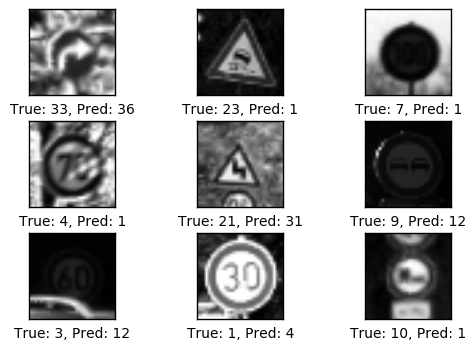

In [44]:
print_test_accuracy(show_example_errors=True)

NOTE:: It seems very low light condition issue to me.

In [45]:
import math
def plot_conv_weights(weights, input_channel=0):
    # Assume weights are TensorFlow ops for 4-dim variables
    # e.g. weights_conv1 or weights_conv2.
    
    # Retrieve the values of the weight-variables from TensorFlow.
    # A feed-dict is not necessary because nothing is calculated.
    w = session.run(weights)

    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(w)
    w_max = np.max(w)

    # Number of filters used in the conv. layer.
    num_filters = w.shape[3]

    # Number of grids to plot.
    # Rounded-up, square-root of the number of filters.
    num_grids = math.ceil(math.sqrt(num_filters))
    
    # Create figure with a grid of sub-plots.
    fig, axes = plt.subplots(num_grids, num_grids)

    # Plot all the filter-weights.
    for i, ax in enumerate(axes.flat):
        # Only plot the valid filter-weights.
        if i<num_filters:
            # Get the weights for the i'th filter of the input channel.
            # See new_conv_layer() for details on the format
            # of this 4-dim tensor.
            img = w[:, :, input_channel, i]

            # Plot image.
            ax.imshow(img, vmin=w_min, vmax=w_max,
                      interpolation='nearest', cmap='seismic')
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

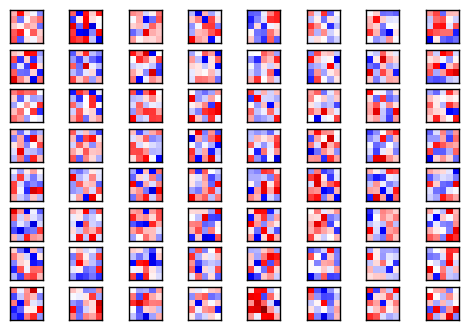

In [46]:
plot_conv_weights(weights_conv2)

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
1) I used cross_entropy using  tf.nn.softmax_cross_entropy_with_logits(logits=layer_fc2,
                                                        labels=y_true)
    and then cost function 
    cost = tf.reduce_mean(cross_entropy)
2) I used  tf.train.AdamOptimizer as optimizer.
I am using correct prediction as  tf.equal(y_pred_cls, y_true_cls).
and accuracy function as tf.reduce_mean(tf.cast(correct_prediction, tf.float32)). 

3) I used batch size as 64 and epocs 5 epocs to reach to good results.
4) Hyper parameters
    a) Input feature maps for first layer is single channel 32x32. Output feature maps are 32 for first layer. Fileter sizes are 5x5 followed by non-linearity.
    b) Second convolution layer has filter as 5x5 but output feature map is 64 deep.
    e) My two fully connected layers have 2048 nodes. 
    f) I am using drop outs for regularizations.
    

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**
I tried various combinations of architecture. 
a) Tried deeper layers.
b) Different learning rates and epochs.
c) I also tried different variance for weights to get to this results.
d) I tried different sizes for input feature map and output feature maps.
e) Finally the right combination of epochs, learning rate and OFMs helped alot.
f) Also the larger fully connected layer is helping.
h) I reached upto 99% accuracy on some validation sets.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [47]:
### Load the images and plot them here.
from skimage.io import imread
im_set = []
im = imread('/home/ajit/self_drive/P3/downloaded/speed_30_label_1.jpg')
im_set.append(im)
print(im.shape)
im = imread('/home/ajit/self_drive/P3/downloaded/speed_50_label_2.jpg')
im_set.append(im)
print(im.shape)
im = imread('/home/ajit/self_drive/P3/downloaded/speed_70_label_4.jpg')
im_set.append(im)
print(im.shape)
im = imread('/home/ajit/self_drive/P3/downloaded/stop_label_14.jpg')
im_set.append(im)
print(im.shape)
im = imread('/home/ajit/self_drive/P3/downloaded/warning_sign_label_18.jpg')
im_set.append(im)
print(im.shape)
test = np.concatenate(im_set , axis=0)
sh = (-1, 32, 32, 3)
test = np.reshape(test, sh)
print(len(im_set))
print(test.shape)
test = pre_proc(test)
print(test.shape)
sh = (-1, 32, 32, 1)
test = np.reshape(test, sh)
print(test.shape)
labels = [1, 2, 4 , 14 ,18]
lab_true = np.zeros([5,43])
lab_true[0][0]=1;
lab_true[1][1]=1;
lab_true[2][3]=1;
lab_true[3][13]=1;
lab_true[4][17]=1;
feed_dict = {x: test,
                     y_true: lab_true, keep_prob:1.0}
        
# Calculate the predicted class using TensorFlow.
cls_pred = session.run(y_pred_cls, feed_dict=feed_dict)
print("Predicted labels")
print(cls_pred)
print("Original labels")
print(labels)
### Lets try to find top 5 probabilities
top_5 = session.run(top_5_prob, feed_dict=feed_dict)
#lab_true
### Feel free to use as many code cells as needed.

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
5
(5, 32, 32, 3)
(5, 32, 32, 1)
(5, 32, 32, 1)
Predicted labels
[ 1  2  4 14 26]
Original labels
[1, 2, 4, 14, 18]


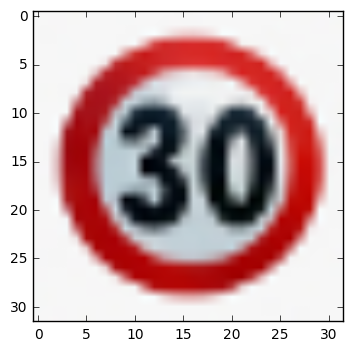

In [50]:
im = imread('/home/ajit/self_drive/P3/downloaded/speed_30_label_1.jpg')
plt.imshow(im) 
plt.show()

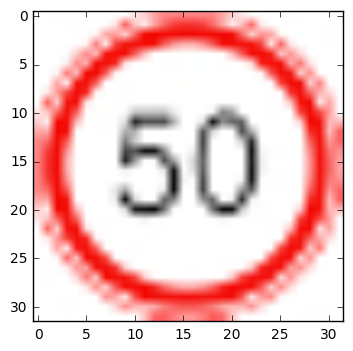

In [51]:
im = imread('/home/ajit/self_drive/P3//downloaded/speed_50_label_2.jpg')
plt.imshow(im)    
plt.show()

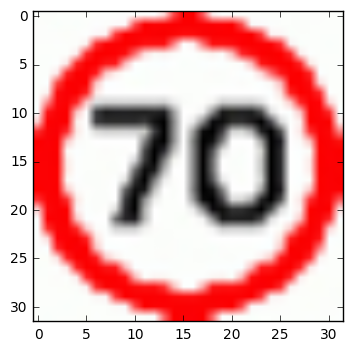

In [52]:
im = imread('/home/ajit/self_drive/P3//downloaded/speed_70_label_4.jpg')
plt.imshow(im)    
plt.show()

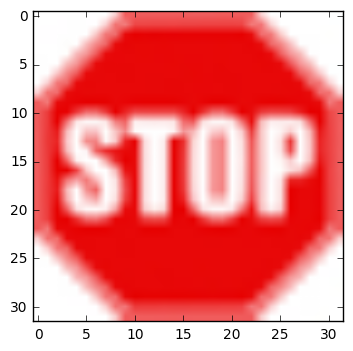

In [53]:
im = imread('/home/ajit/self_drive/P3//downloaded/stop_label_14.jpg')
plt.imshow(im)    
plt.show()

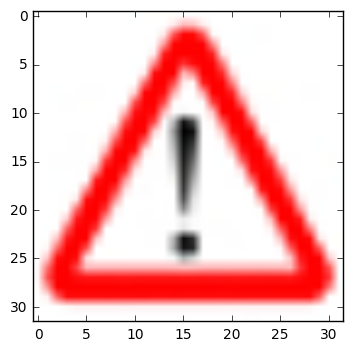

In [54]:
im = imread('/home/ajit/self_drive/P3//downloaded/warning_sign_label_18.jpg')
plt.imshow(im)    
plt.show()

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**
I have mis classification in case of speed limit. All these images have a circle outside and a number inside. My clasification is happening within this subset for example speed limit 50 is reported as speed limit speed limit 30. Waring sign is predicted correctly. Also Stop is predicted correctly

[  9.98516262e-01   8.36173305e-04   6.46954868e-04   3.89135067e-07
   1.80401514e-07]
[ 1  5  0  3 11]


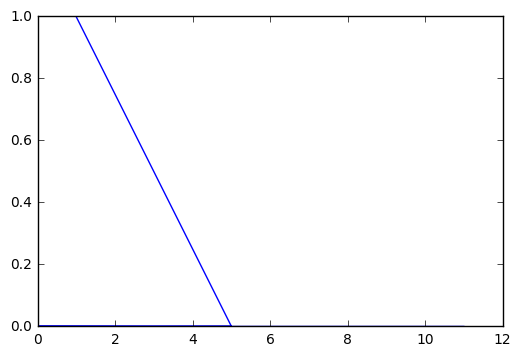

In [63]:
### Run the predictions here.
print(top_5.values[0])
print(top_5.indices[0])
y = top_5.values[0]
x = top_5.indices[0]
plt.plot(x,y)
plt.show()
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**
My model is able to classify majority images correctly. But for rest of the images it's able to classifiy that these are speed limit images. It's not able to tell what that exact limit is.

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**
I analsed the top 5 probabilties and model is able to tell correct answer in the set.

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**
Since it's only 5 images, I loaded them with simple numpy commands. I did not create any framework for it. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.